## Scikit-Learn Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


### Make some sample data
- Make synthetic 2D data with 4 'real' clusters

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

#### Scatterplot of sample data

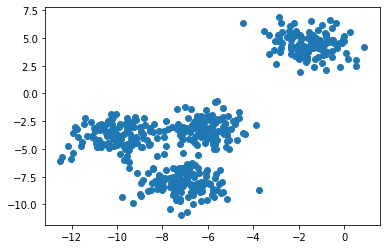

In [3]:
plt.scatter(X[:,0], X[:,1])

### Use 'Elbow' method to find optimal value of K

Text(0.5, 1.0, 'RSS versus K')

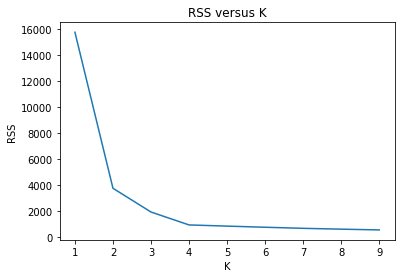

In [4]:
from sklearn.cluster import KMeans
ncluster_list = range(1,10)

def kmean_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    rss = -km.score(X)
    return rss
scores = [kmean_score(i) for i in range(1,10)]
plt.plot(range(1,10), scores)
plt.xlabel('K')
plt.ylabel('RSS')
plt.title('RSS versus K')


### Use Silhouette scores to find optimal value of K

Text(0.5, 1.0, 'Silhouette Score vs K')

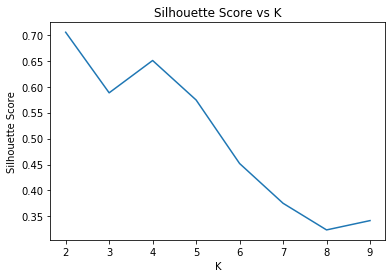

In [5]:
from sklearn.metrics import silhouette_score
def get_silhouette_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    sil_avg = silhouette_score(X, km.labels_)
    return sil_avg
sil_scores = [get_silhouette_score(i) for i in range(2,10)]
plt.plot(range(2,10), sil_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')


The maximum silhouette score is at 2 and there is a local maximum at 4